In [1]:
import torch #这一行导入了 torch 库，这是 PyTorch 的核心库，提供了张量操作和自动微分功能
import torch.nn as nn #这一行导入了 torch.nn 模块，并将其简写为 nn。torch.nn 模块包含了构建神经网络所需的各种类和函数
import torchvision.datasets as datasets  #这一行导入了 torchvision.datasets 模块，并将其简写为 datasets。torchvision.datasets 提供了许多常用的图像数据集，方便进行深度学习模型的训练和测试。
import torchvision.transforms as transforms # 这一行导入了 torchvision.transforms 模块，并将其简写为 transforms。torchvision.transforms 提供了多种图像预处理和数据增强的方法。

In [2]:
input_size = 784        #Number of input neurons (image pixels)
hidden_size = 400       #Number of hidden neurons
#对于 MNIST 图像，所以每幅图像都是 784 像素所以 28 乘以 28 等于 784。在这种情况下，隐藏神经元的数量为 400。
# 但我更喜欢选择的方式基本上就是输入大小加上输出大小除以二。输出大小是 10，所以 784 加 10 是 794，所以我估计输入大小为 800.如果除以二，则会得到 400。
# 所以这是一个非常好的选择方式-隐藏神经元的数量，这基本上就是输入加上输出除以二。
out_size = 10           #Number of classes (0-9)
epochs = 10            #How many times we pass our entire dataset into our network
batch_size = 100        #Input size of the data during one iteration
learning_rate = 0.001   #How fast we are learning

In [3]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor(),
                              download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 13.3MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



```python
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
```
这一行代码创建了一个训练数据集 `train_dataset`，使用的是 MNIST 数据集。具体参数解释如下：
- `root='./data'`：指定数据集的存储路径为当前目录下的 `data` 文件夹。
- `train=True`：表示加载训练集。
- `transform=transforms.ToTensor()`：将图像数据转换为 PyTorch 的张量格式。
- `download=True`：如果数据集不存在，则从互联网下载。

```python
test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
```
这一行代码创建了一个测试数据集 `test_dataset`，同样使用的是 MNIST 数据集。具体参数解释如下：
- `root='./data'`：指定数据集的存储路径为当前目录下的 `data` 文件夹。
- `train=False`：表示加载测试集。
- `transform=transforms.ToTensor()`：将图像数据转换为 PyTorch 的张量格式。
- `download` 参数在这里没有指定，默认值为 `False`，表示如果数据集不存在则不会下载。

### 代码优化建议

1. **代码格式**：为了提高代码的可读性，可以对齐参数，使其更整齐。例如：

    ```python
    train_dataset = datasets.MNIST(
        root='./data',
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )

    test_dataset = datasets.MNIST(
        root='./data',
        train=False,
        transform=transforms.ToTensor()
    )
    ```

2. **下载参数**：在创建测试数据集时，如果数据集不存在，可以考虑添加 `download=True` 参数，以确保数据集能够自动下载：

    ```python
    test_dataset = datasets.MNIST(
        root='./data',
        train=False,
        transform=transforms.ToTensor(),
        download=True
    )
    ```

3. **数据增强**：在实际应用中，通常会对训练数据进行数据增强，以提高模型的泛化能力。可以考虑在 `transforms` 中添加更多的预处理和数据增强操作。例如：

    ```python
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(28, padding=4),
        transforms.ToTensor()
    ])

    train_dataset = datasets.MNIST(
        root='./data',
        train=True,
        transform=transform,
        download=True
    )
    ```

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

In [10]:
#make data iterable by loading it to a loader. Shuffle the training data to make it independant of the order
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True) #我们不希望我们的网络了解这些图像的顺序。我们希望它们是随机的。这就是为什么我们需要改组。

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

好的，我会逐行解释这段代码，并提供一些优化建议。

```python
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
```
这一行代码创建了一个训练数据加载器 `train_loader`，用于批量加载训练数据。具体参数解释如下：
- `dataset=train_dataset`：指定要加载的数据集为之前定义的 `train_dataset`。
- `batch_size=batch_size`：指定每个批次的数据量大小，由变量 `batch_size` 决定。
- `shuffle=True`：表示在每个epoch开始时打乱数据集，以提高模型的泛化能力。

```python
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
```
这一行代码创建了一个测试数据加载器 `test_loader`，用于批量加载测试数据。具体参数解释如下：
- `dataset=test_dataset`：指定要加载的数据集为之前定义的 `test_dataset`。
- `batch_size=batch_size`：指定每个批次的数据量大小，由变量 `batch_size` 决定。
- `shuffle=False`：表示不打乱测试数据集的顺序，通常在测试时保持数据顺序不变。

### 代码优化建议

1. **代码格式**：为了提高代码的可读性，可以对齐参数，使其更整齐。例如：

    ```python
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False
    )
    ```

2. **批量大小**：确保 `batch_size` 变量已经定义，并且选择合适的批量大小。通常，批量大小是2的幂次方（如32、64、128等），以便更好地利用GPU的计算资源。

3. **多线程加载**：可以考虑使用 `num_workers` 参数来加速数据加载过程，特别是在数据预处理较为复杂时。例如：

    ```python
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4
    )

    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4
    )
    ```

4. **pin_memory**：如果使用GPU进行训练，可以设置 `pin_memory=True` 以加速数据传输到GPU：

    ```python
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )
    ```

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

![nn mnist](https://user-images.githubusercontent.com/30661597/61593615-5eb8bf00-ac14-11e9-8087-f880971b3543.png)


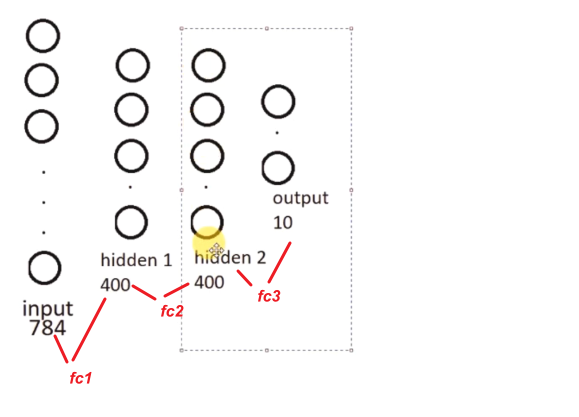

In [4]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)    #First Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)      #Second Layer Activation
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

好的，我会逐行解释这段代码，并提供一些优化建议。

```python
class Net(nn.Module):
```
这一行定义了一个名为 `Net` 的类，继承自 `nn.Module`，这是所有神经网络模块的基类。

```python
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
```
这一行是类的构造函数 `__init__`，用于初始化网络结构。`super(Net, self).__init__()` 调用了父类 `nn.Module` 的构造函数。

```python
        self.fc1 = nn.Linear(input_size, hidden_size)    # First Layer
```
这一行定义了第一层全连接层（线性层），输入大小为 `input_size`，输出大小为 `hidden_size`。

```python
        self.fc2 = nn.Linear(hidden_size, hidden_size)   # Second Layer Activation
```
这一行定义了第二层全连接层，输入和输出大小均为 `hidden_size`。

```python
        self.fc3 = nn.Linear(hidden_size, out_size)
```
这一行定义了第三层全连接层，输入大小为 `hidden_size`，输出大小为 `out_size`。

```python
        self.relu = nn.ReLU()
```
这一行定义了 ReLU 激活函数。

```python
        self.init_weights()
```
这一行调用了 `init_weights` 方法来初始化权重。

```python
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
```
这一方法用于初始化第一层和第二层的权重，使用的是 Kaiming 正态初始化方法。

```python
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
```
这一方法定义了前向传播过程。输入 `x` 依次通过三层全连接层和 ReLU 激活函数，最终输出结果。

### 代码优化建议

1. **权重初始化**：目前只初始化了 `fc1` 和 `fc2` 的权重，建议也初始化 `fc3` 的权重，以保持一致性：

    ```python
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
        nn.init.kaiming_normal_(self.fc3.weight)
    ```

2. **偏置初始化**：除了权重，偏置也可以进行初始化：

    ```python
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
        nn.init.kaiming_normal_(self.fc3.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)
        nn.init.zeros_(self.fc3.bias)
    ```

3. **代码格式**：为了提高代码的可读性，可以对齐注释，使其更整齐。例如：

    ```python
    class Net(nn.Module):
        def __init__(self, input_size, hidden_size, out_size):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)  # First Layer
            self.fc2 = nn.Linear(hidden_size, hidden_size) # Second Layer
            self.fc3 = nn.Linear(hidden_size, out_size)    # Third Layer
            self.relu = nn.ReLU()
            self.init_weights()
        
        def init_weights(self):
            nn.init.kaiming_normal_(self.fc1.weight)
            nn.init.kaiming_normal_(self.fc2.weight)
            nn.init.kaiming_normal_(self.fc3.weight)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.bias)
            nn.init.zeros_(self.fc3.bias)

        def forward(self, x):
            out = self.fc1(x)
            out = self.relu(out)
            out = self.fc2(out)
            out = self.relu(out)
            out = self.fc3(out)
            return out
    ```

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

In [5]:
#Create an object of the class, which represents our network
net = Net(input_size, hidden_size, out_size)
CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
#The loss function. The Cross Entropy loss comes along with Softmax. Therefore, no need to specify Softmax as well
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

好的，我会逐行解释这段代码，并提供一些优化建议。

```python
# Create an object of the class, which represents our network
net = Net(input_size, hidden_size, out_size)
```
这一行代码创建了一个 `Net` 类的对象 `net`，并传入了 `input_size`、`hidden_size` 和 `out_size` 作为参数，代表我们的神经网络。

```python
CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
```
这两行代码检查是否有可用的 GPU（CUDA），如果有，则将网络模型 `net` 移动到 GPU 上，以加速计算。

```python
# The loss function. The Cross Entropy loss comes along with Softmax. Therefore, no need to specify Softmax as well
criterion = nn.CrossEntropyLoss()
```
这一行代码定义了损失函数 `criterion`，使用的是交叉熵损失函数。交叉熵损失函数内部已经包含了 Softmax 操作，因此不需要额外指定 Softmax。

```python
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
```
这一行代码定义了优化器 `optimizer`，使用的是 Adam 优化算法，并将网络模型的参数传递给优化器，同时指定学习率 `learning_rate`。

### 代码优化建议

1. **代码格式**：为了提高代码的可读性，可以对齐注释，使其更整齐。例如：

    ```python
    # Create an object of the class, which represents our network
    net = Net(input_size, hidden_size, out_size)
    
    CUDA = torch.cuda.is_available()
    if CUDA:
        net = net.cuda()
    
    # The loss function. The Cross Entropy loss comes along with Softmax. Therefore, no need to specify Softmax as well
    criterion = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    ```

2. **变量命名**：`CUDA` 变量名可以改为 `use_cuda` 或 `device`，以提高代码的可读性和可维护性。例如：

    ```python
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    ```

3. **设备管理**：可以使用 `torch.device` 来管理设备，这样可以更方便地在 CPU 和 GPU 之间切换。例如：

    ```python
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)
    ```

4. **学习率**：确保 `learning_rate` 变量已经定义，并且选择合适的学习率。通常，学习率需要根据具体任务进行调整。

5. **注释**：注释可以更加详细，以便其他人更容易理解代码。例如：

    ```python
    # 创建一个网络对象
    net = Net(input_size, hidden_size, out_size)
    
    # 检查是否有可用的 GPU，如果有则将网络模型移动到 GPU 上
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)
    
    # 定义损失函数，使用交叉熵损失函数
    criterion = nn.CrossEntropyLoss()
    
    # 定义优化器，使用 Adam 优化算法，并指定学习率
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    ```

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

In [6]:
net.parameters()

<generator object Module.parameters at 0x7f37fb889e00>

In [7]:
list(net.parameters()) #这些是对应的张量，对应的数组或矩阵每个网络层。所以这里给出的是张量，

[Parameter containing:
 tensor([[-0.0398, -0.0050, -0.0453,  ...,  0.0205, -0.0093,  0.0357],
         [-0.0016, -0.0724, -0.0508,  ...,  0.0649, -0.0349,  0.0085],
         [ 0.0188, -0.0323,  0.0642,  ..., -0.0031,  0.0031,  0.0134],
         ...,
         [ 0.0105, -0.0467,  0.0171,  ...,  0.0797, -0.1353,  0.0600],
         [ 0.0401, -0.0726,  0.0274,  ...,  0.0742, -0.0374,  0.0510],
         [-0.0451, -0.0519, -0.0234,  ...,  0.0436, -0.0145, -0.0752]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-3.2263e-02, -2.8631e-02, -4.4220e-03, -2.0122e-02, -3.5858e-03,
         -3.2265e-02, -3.4320e-02,  6.0790e-03, -1.7410e-02,  1.9857e-02,
         -2.7107e-02,  7.8285e-03, -2.7582e-02, -2.4457e-02,  1.5560e-02,
         -6.1024e-03,  1.9519e-02,  1.4573e-02,  1.6601e-02, -5.5170e-03,
         -8.6231e-03, -9.0464e-03, -2.4719e-02,  1.1137e-02,  3.2546e-02,
          2.5332e-02, -2.8487e-02, -1.9335e-02,  1.8418e-02, -2.1442e-02,
         -1.3682e-02, -

In [8]:
print(net.parameters) #如果你只是想看看这些参数是什么，那么您只需要输入 net.parameters,所以你可以看到这些是你的图层

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
  (relu): ReLU()
)>


可视化训练数据加载器（train loader）的。具体来说，它打印了图像数据在重新调整形状前后的尺寸。

- `for i, (images, labels) in enumerate(train_loader):`：遍历训练数据加载器中的每一个批次，`images` 是图像数据，`labels` 是对应的标签。
- `print(images.size())`：打印图像数据的原始尺寸。
- `images = images.view(-1, 784)`：将图像数据重新调整形状。假设原始图像是28x28像素的灰度图像，这里将其展平为长度为784的一维向量。`-1` 表示自动计算批次大小。
- `print(images.size())`：打印重新调整形状后的图像数据尺寸。

这段代码通常用于处理像MNIST这样的数据集，其中每个图像是28x28像素的灰度图像。通过将图像展平为一维向量，可以更方便地输入到神经网络中进行训练。

In [12]:
# Visualize the train loader
for i, (images, labels) in enumerate(train_loader):
    print(images.size())  # 打印图像数据的原始尺寸
    images = images.view(-1, 784)  # 将图像数据重新调整形状为 (batch_size, 784)
    print(images.size())  # 打印重新调整形状后的图像数据尺寸

# result:
# torch.Size([100, 1, 28, 28]) 100- batch size, 1 -
# torch.Size([100, 784])

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

在 PyTorch 中，`train_loader` 通常是一个数据加载器（DataLoader），用于批量加载训练数据。你的代码片段展示了如何遍历 `train_loader` 并打印图像数据的尺寸。让我们详细解释一下每个步骤和打印结果的含义。

### 代码解释

```python
for i, (images, labels) in enumerate(train_loader):
    print(images.size())  # 打印图像数据的原始尺寸
    images = images.view(-1, 784)  # 将图像数据重新调整形状为 (batch_size, 784)
    print(images.size())  # 打印重新调整形状后的图像数据尺寸
```

### 打印结果解释

```plaintext
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
```

#### 原始尺寸 `torch.Size([100, 1, 28, 28])`

- `100`: 这是批量大小（batch size），表示每个批次包含 100 张图像。
- `1`: 这是通道数（channels），对于灰度图像，通道数为 1。如果是彩色图像，通道数通常为 3（对应 RGB 三个通道）。
- `28`: 这是图像的高度（height），表示每张图像有 28 个像素高。
- `28`: 这是图像的宽度（width），表示每张图像有 28 个像素宽。

所以，`torch.Size([100, 1, 28, 28])` 表示一个批次包含 100 张 28x28 像素的灰度图像。

#### 调整形状后的尺寸 `torch.Size([100, 784])`

- `100`: 仍然是批量大小（batch size），表示每个批次包含 100 张图像。
- `784`: 这是每张图像展开后的大小。28x28 的图像展开成一个 784 维的向量（28 * 28 = 784）。

`images.view(-1, 784)` 的作用是将每张 28x28 的图像展平成一个 784 维的向量。`-1` 表示自动计算这个维度的大小，以确保总元素数量不变。

### 总结

- `torch.Size([100, 1, 28, 28])` 表示一个批次包含 100 张 28x28 像素的灰度图像。
- `torch.Size([100, 784])` 表示将每张 28x28 的图像展平成一个 784 维的向量后，一个批次包含 100 个这样的向量。

这种调整形状的操作通常用于将图像数据输入到全连接层（fully connected layer）中，因为全连接层通常期望输入是一个一维向量。

In [11]:
#Train the network
for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        #Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100,784) and wrap it in a variable
        images = images.view(-1, 28*28)
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()

        outputs = net(images)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)   # return the second argument of torch.max which represents

        correct_train += (predicted == labels).sum()
        loss = criterion(outputs, labels)                 # Difference between the actual and predicted (loss function)
        running_loss += loss.item()
        #clear the param_grad in param = param - lr*param_grad, so it won't be accumulated
        optimizer.zero_grad()
        loss.backward()                                   # Backpropagation
        optimizer.step()                                  # Update the weights

    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format
          (epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))))
print("DONE TRAINING!")

Epoch [1/10], Training Loss: 0.238, Training Accuracy: 92.973%
Epoch [2/10], Training Loss: 0.086, Training Accuracy: 97.362%
Epoch [3/10], Training Loss: 0.055, Training Accuracy: 98.273%
Epoch [4/10], Training Loss: 0.039, Training Accuracy: 98.723%
Epoch [5/10], Training Loss: 0.028, Training Accuracy: 99.080%
Epoch [6/10], Training Loss: 0.022, Training Accuracy: 99.222%
Epoch [7/10], Training Loss: 0.020, Training Accuracy: 99.303%
Epoch [8/10], Training Loss: 0.017, Training Accuracy: 99.432%
Epoch [9/10], Training Loss: 0.012, Training Accuracy: 99.578%
Epoch [10/10], Training Loss: 0.016, Training Accuracy: 99.448%
DONE TRAINING!


好的，我会逐行解释这段代码，并提供一些优化建议。

```python
# Train the network
for epoch in range(epochs):
```
这一行代码开始一个训练循环，循环次数为 `epochs`。

```python
    correct_train = 0
    running_loss = 0
```
这两行代码初始化了两个变量：`correct_train` 用于记录训练过程中预测正确的样本数量，`running_loss` 用于记录累计的损失值。

```python
    for i, (images, labels) in enumerate(train_loader):
```
这一行代码开始一个批次循环，从 `train_loader` 中获取批次数据 `images` 和对应的标签 `labels`。

```python
        # Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100,784) and wrap it in a variable
        images = images.view(-1, 28*28)
```
这一行代码将图像数据从形状 `(batch_size, 1, 28, 28)` 展平为 `(batch_size, 784)`，其中 `784` 是 `28*28` 的结果。

```python
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
```
这两行代码检查是否有可用的 GPU，如果有，则将图像和标签数据移动到 GPU 上。

```python
        outputs = net(images)
```
这一行代码将图像数据输入网络 `net`，得到输出 `outputs`。

```python
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum()
```
这两行代码计算预测结果 `predicted`，并将预测正确的样本数量累加到 `correct_train` 中。

torch.max的意思是: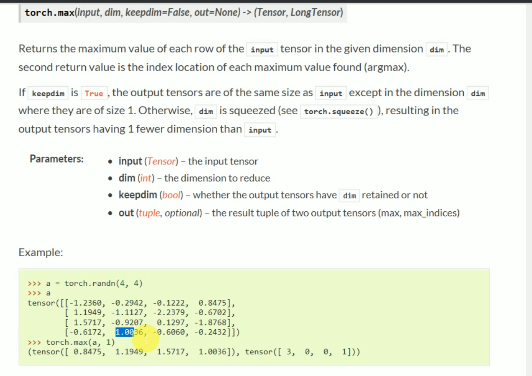

```python
        loss = criterion(outputs, labels)  # Difference between the actual and predicted (loss function)
        running_loss += loss.item()
```
这两行代码计算损失 `loss`，并将损失值累加到 `running_loss` 中。

```python
        optimizer.zero_grad()
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
```
这三行代码执行优化步骤：首先将梯度清零，然后进行反向传播计算梯度，最后更新网络权重。

```python
    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format
          (epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))))
```
这一行代码打印当前 epoch 的训练损失和训练准确率。

```python
print("DONE TRAINING!")
```
这一行代码在训练完成后打印 "DONE TRAINING!"。

### 代码优化建议

1. **代码格式**：为了提高代码的可读性，可以对齐注释，使其更整齐。例如：

    ```python
    # Train the network
    for epoch in range(epochs):
        correct_train = 0
        running_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            # Flatten the image from size (batch,1,28,28) --> (batch_size,784)
            images = images.view(-1, 28*28)
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct_train += (predicted == labels).sum()
            loss = criterion(outputs, labels)  # Difference between the actual and predicted (loss function)
            running_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the weights
        
        print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format(
            epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))
        ))
    print("DONE TRAINING!")
    ```

2. **设备管理**：可以使用 `torch.device` 来管理设备，这样可以更方便地在 CPU 和 GPU 之间切换。例如：

    ```python
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)
    
    # Train the network
    for epoch in range(epochs):
        correct_train = 0
        running_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            # Flatten the image from size (batch,1,28,28) --> (batch_size,784)
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct_train += (predicted == labels).sum()
            loss = criterion(outputs, labels)  # Difference between the actual and predicted (loss function)
            running_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the weights
        
        print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format(
            epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))
        ))
    print("DONE TRAINING!")
    ```

3. **批次大小**：确保 `batch_size` 变量已经定义，并且选择合适的批次大小。通常，批次大小是2的幂次方（如32、64、128等），以便更好地利用GPU的计算资源。

4. **学习率**：确保 `learning_rate` 变量已经定义，并且选择合适的学习率。通常，学习率需要根据具体任务进行调整。

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

In [12]:
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        images = images.view(-1, 28*28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))

Accuracy of the network on the 10000 test images: 97.83 %


好的，我会逐行解释这段代码，并提供一些优化建议。

```python
with torch.no_grad():
```
这一行代码使用 `torch.no_grad()` 上下文管理器，表示在这个上下文中不需要计算梯度，从而节省内存和计算资源。这通常用于模型评估阶段。

```python
    correct = 0
```
这一行代码初始化变量 `correct`，用于记录测试过程中预测正确的样本数量。

```python
    for images, labels in test_loader:
```
这一行代码开始一个批次循环，从 `test_loader` 中获取批次数据 `images` 和对应的标签 `labels`。

```python
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
```
这两行代码检查是否有可用的 GPU，如果有，则将图像和标签数据移动到 GPU 上。

```python
        images = images.view(-1, 28*28)
```
这一行代码将图像数据从形状 `(batch_size, 1, 28, 28)` 展平为 `(batch_size, 784)`，其中 `784` 是 `28*28` 的结果。

```python
        outputs = net(images)
```
这一行代码将图像数据输入网络 `net`，得到输出 `outputs`。

```python
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
```
这两行代码计算预测结果 `predicted`，并将预测正确的样本数量累加到 `correct` 中。

```python
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))
```
这一行代码打印网络在测试集上的准确率。

### 代码优化建议

1. **代码格式**：为了提高代码的可读性，可以对齐注释，使其更整齐。例如：

    ```python
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            images = images.view(-1, 28*28)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))
    ```

2. **设备管理**：可以使用 `torch.device` 来管理设备，这样可以更方便地在 CPU 和 GPU 之间切换。例如：

    ```python
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)
    
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))
    ```

3. **批次大小**：确保 `batch_size` 变量已经定义，并且选择合适的批次大小。通常，批次大小是2的幂次方（如32、64、128等），以便更好地利用GPU的计算资源。

4. **学习率**：确保 `learning_rate` 变量已经定义，并且选择合适的学习率。通常，学习率需要根据具体任务进行调整。

5. **注释**：注释可以更加详细，以便其他人更容易理解代码。例如：

    ```python
    with torch.no_grad():  # Disable gradient calculation for evaluation
        correct = 0
        for images, labels in test_loader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            images = images.view(-1, 28*28)  # Flatten the images
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))
    ```

总体来说，这段代码没有明显的错误，结构也很清晰。希望这些解释和建议对你有帮助！

好的，我会详细解释这两行代码的具体含义。

```python
_, predicted = torch.max(outputs.data, 1)
```
这一行代码的作用是从网络的输出中找到每个样本的预测类别。具体步骤如下：

1. `outputs` 是网络的输出张量，形状为 `(batch_size, num_classes)`，其中 `batch_size` 是批次大小，`num_classes` 是分类的类别数。
2. `outputs.data` 获取输出张量的原始数据，不包含梯度信息。
3. `torch.max(outputs.data, 1)` 在维度1（即每个样本的类别维度）上找到最大值及其索引。返回值是一个包含两个元素的元组，第一个元素是最大值，第二个元素是最大值的索引。
4. `_` 表示我们不关心最大值本身，只关心其索引，因此用 `_` 来占位。
5. `predicted` 是一个张量，包含每个样本的预测类别索引。

例如，如果 `outputs` 是一个形状为 `(3, 10)` 的张量，表示一个批次中有3个样本，每个样本有10个类别的预测值：

```python
outputs = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0],
                        [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4]])
```

调用 `torch.max(outputs.data, 1)` 后，`predicted` 将是：

```python
predicted = torch.tensor([9, 0, 5])
```

表示第一个样本的预测类别是第9类，第二个样本的预测类别是第0类，第三个样本的预测类别是第5类。

```python
correct += (predicted == labels).sum().item()
```
这一行代码的作用是计算预测正确的样本数量，并将其累加到 `correct` 变量中。具体步骤如下：

1. `predicted == labels` 生成一个布尔张量，表示每个样本的预测类别是否与真实标签 `labels` 相同。
2. `(predicted == labels).sum()` 计算布尔张量中 `True` 的数量，即预测正确的样本数量。
3. `.item()` 将张量转换为一个 Python 标量值。
4. `correct += ...` 将预测正确的样本数量累加到 `correct` 变量中。

例如，如果 `predicted` 是 `[9, 0, 5]`，`labels` 是 `[9, 1, 5]`，则 `predicted == labels` 生成 `[True, False, True]`，`(predicted == labels).sum()` 结果为 `2`，表示有两个样本预测正确。

### 代码示例

为了更好地理解这两行代码，我们可以看一个完整的示例：

```python
import torch

# 假设有一个批次的输出和真实标签
outputs = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0],
                        [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4]])
labels = torch.tensor([9, 1, 5])

# 计算预测结果
_, predicted = torch.max(outputs.data, 1)
print("Predicted:", predicted)

# 计算预测正确的样本数量
correct = (predicted == labels).sum().item()
print("Correct:", correct)
```

输出结果为：

```
Predicted: tensor([9, 0, 5])
Correct: 2
```

希望这些解释和示例对你有帮助！